In [1]:
from __future__ import print_function
import os
os.chdir(os.path.join(os.environ["RNB_PLANNING_DIR"], 'src'))

## init stereo aruco detector scene builder

In [2]:
from pkg.detector.aruco.marker_config import *
from pkg.detector.aruco.stereo import ArucoStereo
from pkg.detector.camera.realsense import RealSense
from pkg.detector.camera.kinect import Kinect
from pkg.geometry.builder.scene_builder import SceneBuilder

s_builder = SceneBuilder(None)
# s_builder.reset_reference_coord(ref_name="floor")

In [3]:
from pkg.planning.filtering.reach_filter import ReachTrainer
from pkg.controller.combined_robot import *

In [4]:
rtrain = ReachTrainer(scene_builder=s_builder)

## collect and train

In [1]:
rtrain.collect_and_learn(RobotType.indy7, "indy0_tcp", 
                         TRAIN_COUNT=20000, TEST_COUNT=5000, save_data=True, save_model=True, timeout=0.3)
import matplotlib.pyplot as plt
plt.plot(rtrain.time_plan, '.')

In [ ]:
rtrain.collect_and_learn(RobotType.panda, "panda0_hand", 
                         TRAIN_COUNT=20000, TEST_COUNT=5000, save_data=True, save_model=True, timeout=1)
import matplotlib.pyplot as plt
plt.plot(rtrain.time_plan, '.')

## load and train

In [5]:
C_svm_list = [64, 128, 256, 512, 1024, 2048, 4096]
test_indy_list = []
test_panda_list = []
for C_svm in C_svm_list:
    test_indy = rtrain.load_and_learn(RobotType.indy7, C_svm=C_svm)
    test_panda = rtrain.load_and_learn(RobotType.panda, C_svm=C_svm)
    test_indy_list.append(test_indy)
    test_panda_list.append(test_panda)

trainset: 	563.6 ms/1 = 563.6 ms (563.578/563.578)
testset: 	139.4 ms/1 = 139.4 ms (139.436/139.436)

trainning accuracy = 98.76 %
test accuracy = 97.96 %
trainning success accuracy = 98.69 %
trainning failure accuracy = 98.78 %
test success accuracy = 97.56 %
test failure accuracy = 98.1 %
trainset: 	595.0 ms/1 = 595.0 ms (595.039/595.039)
testset: 	146.4 ms/1 = 146.4 ms (146.429/146.429)

trainning accuracy = 98.25 %
test accuracy = 97.74 %
trainning success accuracy = 96.44 %
trainning failure accuracy = 98.64 %
test success accuracy = 93.91 %
test failure accuracy = 98.55 %
trainset: 	500.5 ms/1 = 500.5 ms (500.47/500.47)
testset: 	123.2 ms/1 = 123.2 ms (123.236/123.236)

trainning accuracy = 98.98 %
test accuracy = 98.24 %
trainning success accuracy = 99.02 %
trainning failure accuracy = 98.96 %
test success accuracy = 97.94 %
test failure accuracy = 98.35 %
trainset: 	539.1 ms/1 = 539.1 ms (539.069/539.069)
testset: 	133.6 ms/1 = 133.6 ms (133.633/133.633)

trainning accuracy = 9

trainset: 	274.6 ms/1 = 274.6 ms (274.574/274.574)
testset: 	66.3 ms/1 = 66.3 ms (66.302/66.302)

trainning accuracy = 99.54 %
test accuracy = 98.34 %
trainning success accuracy = 99.51 %
trainning failure accuracy = 99.55 %
test success accuracy = 97.48 %
test failure accuracy = 98.64 %
trainset: 	365.8 ms/1 = 365.8 ms (365.814/365.814)
testset: 	90.2 ms/1 = 90.2 ms (90.223/90.223)

trainning accuracy = 99.11 %
test accuracy = 98.16 %
trainning success accuracy = 98.31 %
trainning failure accuracy = 99.28 %
test success accuracy = 95.4 %
test failure accuracy = 98.74 %


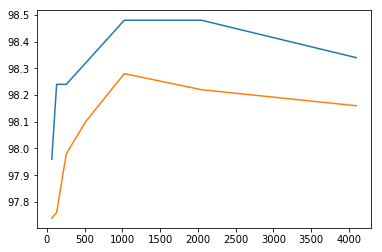

In [6]:
import matplotlib.pyplot as plt
plt.plot(C_svm_list, test_indy_list)
plt.plot(C_svm_list, test_panda_list)

In [7]:
rtrain.load_and_learn(RobotType.indy7, C_svm=1000)
rtrain.load_and_learn(RobotType.panda, C_svm=1000)

trainset: 	346.3 ms/1 = 346.3 ms (346.312/346.312)
testset: 	87.0 ms/1 = 87.0 ms (86.981/86.981)

trainning accuracy = 99.36 %
test accuracy = 98.48 %
trainning success accuracy = 99.24 %
trainning failure accuracy = 99.4 %
test success accuracy = 97.94 %
test failure accuracy = 98.67 %
trainset: 	420.0 ms/1 = 420.0 ms (419.995/419.995)
testset: 	104.6 ms/1 = 104.6 ms (104.629/104.629)

trainning accuracy = 98.85 %
test accuracy = 98.26 %
trainning success accuracy = 97.57 %
trainning failure accuracy = 99.13 %
test success accuracy = 95.29 %
test failure accuracy = 98.89 %


98.26

## load and test

In [6]:
rtrain.load_and_test(RobotType.indy7)
rtrain.load_and_test(RobotType.panda)

trainset: 	318.0 ms/1 = 318.007 ms (318.007/318.007)
testset: 	79.0 ms/1 = 79.133 ms (79.133/79.133)

trainning accuracy = 99.44 %
test accuracy = 98.44 %
trainning success accuracy = 99.38 %
trainning failure accuracy = 99.46 %
test success accuracy = 98.02 % (1286/1312)
test failure accuracy = 98.59 % (3636/3688)
trainset: 	392.0 ms/1 = 392.411 ms (392.411/392.411)
testset: 	98.0 ms/1 = 98.381 ms (98.381/98.381)

trainning accuracy = 98.9 %
test accuracy = 98.16 %
trainning success accuracy = 97.94 %
trainning failure accuracy = 99.11 %
test success accuracy = 95.29 % (829/870)
test failure accuracy = 98.77 % (4079/4130)


In [8]:
rtrain.load_and_test(RobotType.indy7)
rtrain.load_and_test(RobotType.panda)

trainset: 	345.9 ms/1 = 345.9 ms (345.906/345.906)
testset: 	86.3 ms/1 = 86.3 ms (86.256/86.256)

trainning accuracy = 99.36 %
test accuracy = 98.48 %
trainning success accuracy = 99.24 %
trainning failure accuracy = 99.4 %
test success accuracy = 97.94 % (1285/1312)
test failure accuracy = 98.67 % (3639/3688)
trainset: 	417.2 ms/1 = 417.2 ms (417.198/417.198)
testset: 	103.8 ms/1 = 103.8 ms (103.765/103.765)

trainning accuracy = 98.85 %
test accuracy = 98.26 %
trainning success accuracy = 97.57 %
trainning failure accuracy = 99.13 %
test success accuracy = 95.29 % (829/870)
test failure accuracy = 98.89 % (4084/4130)


98.26